# Hexadic Diamond

Use 2D projection of 5D lattice (from 'cut and project' approach to developing a Penrose tiling) to derive the Hexadic Diamond of Erv Wilson.

<a>"https://www.anaphoria.com/diamond.pdf"<a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Rational, Integer

def basis2D(eigenVectors, k, l):
    pi_unicode = "\u03C0"
    
    u,v = (eigenVectors[:,k]+eigenVectors[:,l]).real, (1j*(eigenVectors[:,k]-eigenVectors[:,l])).real
    u /= np.linalg.norm(u)
    v /= np.linalg.norm(v)
    p = np.vstack((u,v))
    
    e1 = p@np.array([0,1,0,0,0])
    e2 = p@np.array([0,0,1,0,0])
    e1 = e1/np.linalg.norm(e1)
    e2 = e2/np.linalg.norm(e2)

    p_rotation = np.arccos(np.dot(e1,e2))*(5/np.pi)
    print(f'-->5D basis vectors are rotated in 2D plane by ({p_rotation}{pi_unicode})/5')

    return p

### Set 5D rotation matrix and find eigenvectors

In [2]:
rotationMatrix = np.array([[0.,1.,0.,0.,0.],[0.,0.,1.,0.,0.],[0.,0.,0.,1.,0.],[0.,0.,0.,0.,1.],[1.,0.,0.,0.,0.]]) 
# rotationMatrix = np.array( [[0,0,0,0,1],[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0]] ) # Senechal
print(rotationMatrix)

eigenValues, eigenVectors = np.linalg.eig(rotationMatrix)

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


### Projection to 2D plane
Select the eigenvectors that project 5D vector to 2D plane with $\frac{2}{3}\pi$ rotation between axes.

In [3]:
# The projection plane
print('2D projection plane:')
p = basis2D(eigenVectors,2,3)

2D projection plane:
-->5D basis vectors are rotated in 2D plane by (2.0π)/5


In [4]:
lo,hi = -1, 2
v_ = np.array(list(range(lo,hi)))
z5 = np.zeros( ((v_.shape[0])**5, 5) )

i=0
for i5 in range(lo,hi):
    for i4 in range(lo,hi):
        for i3 in range(lo,hi):
            for i2 in range(lo,hi):
                for i1 in range(lo,hi):
                    z5[i,:] = np.array([i1,i2,i3,i4,i5])
                    i += 1

### Restrict points such that there is a single interval (or unity) in numerator -- same for denominator

In [5]:
pS = symbols('pS')

xy_ = []
r_ = []

rI = np.array([3,5,7,9,11])

for pt5 in z5:    

    if (np.sum(pt5<0) < 2) and (np.sum(pt5>0) < 2):
        pS = Rational(rI[0],1)**Integer(pt5[0]) * \
            Rational(rI[1],1)**Integer(pt5[1]) * \
            Rational(rI[2],1)**Integer(pt5[2]) * \
            Rational(rI[3],1)**Integer(pt5[3]) * \
            Rational(rI[4],1)**Integer(pt5[4]) 
    
        # Bring into single octave
        while ( pS>2 ):
            pS = pS/ 2
        while ( pS<1 ):
            pS = pS*2
    
        r_.append( str(pS) )
        xy_.append( p@pt5 )

xy_ = np.asarray(xy_)

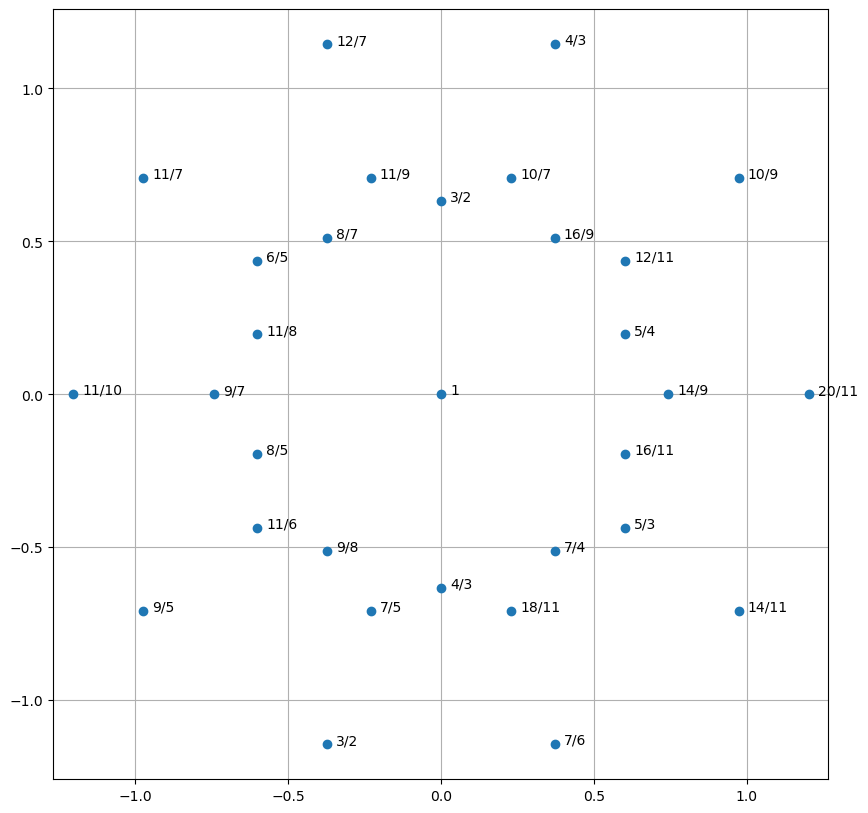

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Rotate 90 degrees to align with Erv Wilson's Hexadic Diamond
x_ = -xy_[:,1]
y_ = xy_[:,0]

ax.plot(x_,y_,'o')
for i,rl in enumerate(r_):                                       # <--
    ax.annotate(rl, xy=[x_[i]+0.03,y_[i]], textcoords='data') # <--

ax.grid()
plt.axis('equal')
# plt.savefig('hexadic_diamond.png')
plt.show()

